<a href="https://colab.research.google.com/github/Wasian98/MATH-120-Final-Project/blob/main/MATH_120_Final_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 120 Final Project: Game Steam Stats for March 2025

#Environment Setup

Run the cell below to set up the environment for either Google Colab or local execution:

In [19]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/MATH-120-Final-Project/'):
        !git clone https://github.com/Wasian98/MATH-120-Final-Project.git

    # Change to project directory
    os.chdir('/content/MATH-120-Final-Project')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Current working directory: /content/MATH-120-Final-Project


#Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from data_processing import load_raw_data, clean_data, save_cleaned_data
from analysis import summary_stats, highest_played_games, stats_by_genre


#Data Loading and Cleaning

In [21]:
# Load raw data
steam_raw = load_raw_data('/content/MATH-120-Final-Project/data_raw/games_march2025_full.csv')
print("\nFirst few rows of Steam data:")
print(steam_raw.head())


First few rows of Steam data:
    appid                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590        Grand Theft Auto V Legacy   2015-04-13            17   0.00   
4  488824  Tom Clancy's Rainbow Six® Siege   2015-12-01            17  19.99   

   dlc_count                               detailed_description  \
0          1  For over two decades, Counter-Strike has offer...   
1          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2          2  The most-played game on Steam. Every day, mill...   
3          0  When a young street hustler, a retired bank ro...   
4          9  Edition Comparison Ultimate Edition The Tom Cl...   

                                      about_the_game  \
0  For over two decades, Coun

In [22]:
# Clean data
steam_clean = clean_data(steam_raw)

print("Cleaned and data shape:", steam_clean.shape)
print("\nData info:")
print(steam_clean.info())

Cleaned and data shape: (3576, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      3576 non-null   object 
 1   release_date              3576 non-null   object 
 2   price                     3576 non-null   float64
 3   metacritic_score          3576 non-null   int64  
 4   genres                    3576 non-null   object 
 5   estimated_owners          3576 non-null   object 
 6   average_playtime_forever  3576 non-null   int64  
 7   average_playtime_2weeks   3576 non-null   int64  
 8   num_reviews_total         3576 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 251.6+ KB
None


In [23]:
# Save cleaned data
save_cleaned_data(steam_clean, 'data/processed_steam_data.csv')
print("Cleaned data saved to data/processed_steam_data.csv")

Cleaned data saved to data/processed_steam_data.csv


#Data Analysis

In [24]:
summary = summary_stats(steam_clean)
summary

{'Highest Playtime': ('FINAL FANTASY XIV Online', 50259),
 'Highest Metacritic Score': ('Disco Elysium - The Final Cut', 97),
 'Highest Amount of Reviews': ('Dota 2', 2452595),
 'Highest Estimated Player Count': ('Grand Theft Auto V Legacy',
  '50000000 - 100000000'),
 'Biggest Genre': ("['Adventure', 'Indie']", 344)}

In [25]:
highest_played = highest_played_games(steam_clean)
highest_played

,name,genres,playtime,metacritic_score,player_reviews
1011,FINAL FANTASY XIV Online,"['Massively Multiplayer', 'RPG']",50259.0,83.0,72564.0
830,Dota 2,"['Action', 'Strategy', 'Free To Play']",43031.0,90.0,2452595.0
3460,World of Warplanes,"['Action', 'Massively Multiplayer', 'Simulatio...",39250.0,69.0,4991.0
1553,Killing Floor 2,['Action'],32774.0,75.0,83309.0
1550,Kholat,"['Adventure', 'Indie']",24607.0,64.0,1959.0
...,...,...,...,...,...
2195,Post Apocalyptic Mayhem,"['Action', 'Racing']",0.0,44.0,755.0
2230,Pylon: Rogue,"['Action', 'Indie', 'RPG']",0.0,50.0,18.0
2229,Puzzle Quest 2,"['RPG', 'Casual']",0.0,83.0,336.0
2228,Puzzle Dimension,"['Casual', 'Indie']",0.0,79.0,439.0


In [26]:
genres = stats_by_genre(steam_clean)
genres

,genre_count,meta_score,average_playtime
genres,,,
"['Action', 'Adventure', 'Casual', 'Indie']",41,74.414634,108.804878
"['Action', 'Adventure', 'Indie', 'RPG', 'Strategy']",17,74.941176,260.411765
"['Action', 'Adventure', 'Indie', 'RPG']",113,72.681416,341.991150
"['Action', 'Adventure', 'Indie', 'Simulation']",17,70.470588,423.823529
"['Action', 'Adventure', 'Indie', 'Strategy']",11,72.727273,212.909091
"['Action', 'Adventure', 'Indie']",282,72.996454,165.283688
"['Action', 'Adventure', 'RPG']",49,75.142857,761.285714
"['Action', 'Adventure']",215,75.144186,466.451163
"['Action', 'Casual', 'Indie']",33,73.090909,85.242424


#Data Visualization

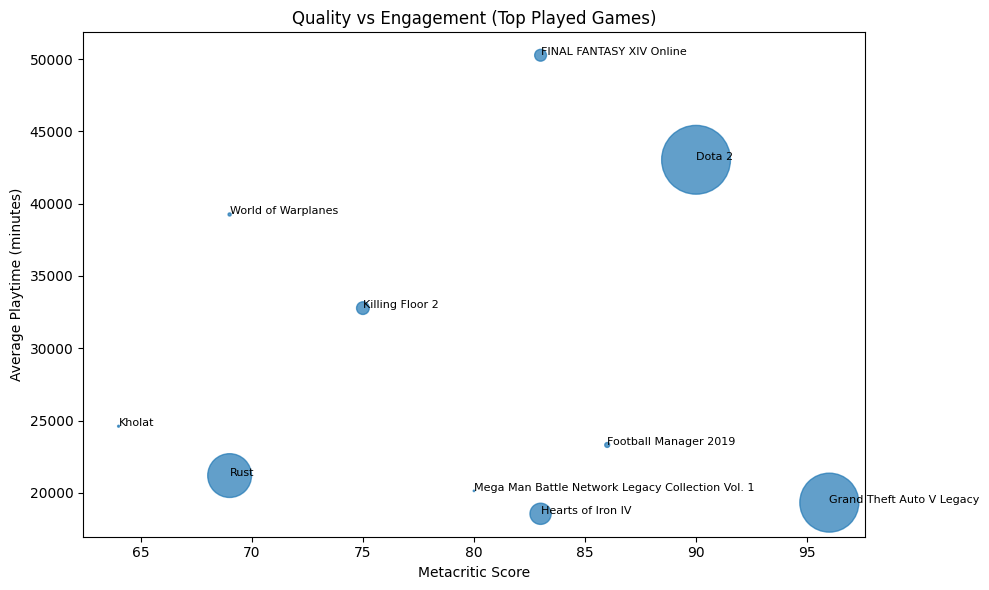

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(
    top_games["metacritic_score"],
    top_games["playtime"],
    s=top_games["player_reviews"] / 1000,
    alpha=0.7
)

for _, row in top_games.iterrows():
    plt.text(row["metacritic_score"], row["playtime"], row["name"], fontsize=8)

plt.xlabel("Metacritic Score")
plt.ylabel("Average Playtime (minutes)")
plt.title("Quality vs Engagement (Top Played Games)")
plt.tight_layout()
plt.show()

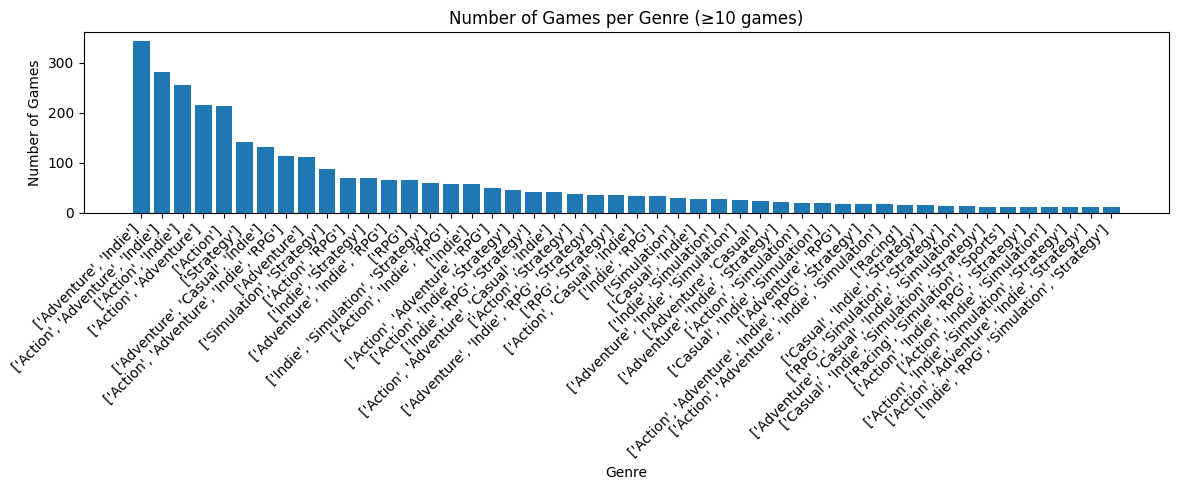

In [28]:
genre_stats = stats_by_genre(steam_clean).sort_values("genre_count", ascending=False)

plt.figure(figsize=(12,5))
plt.bar(genre_stats.index, genre_stats["genre_count"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Games")
plt.xlabel("Genre")
plt.title("Number of Games per Genre (≥10 games)")
plt.tight_layout()
plt.show()


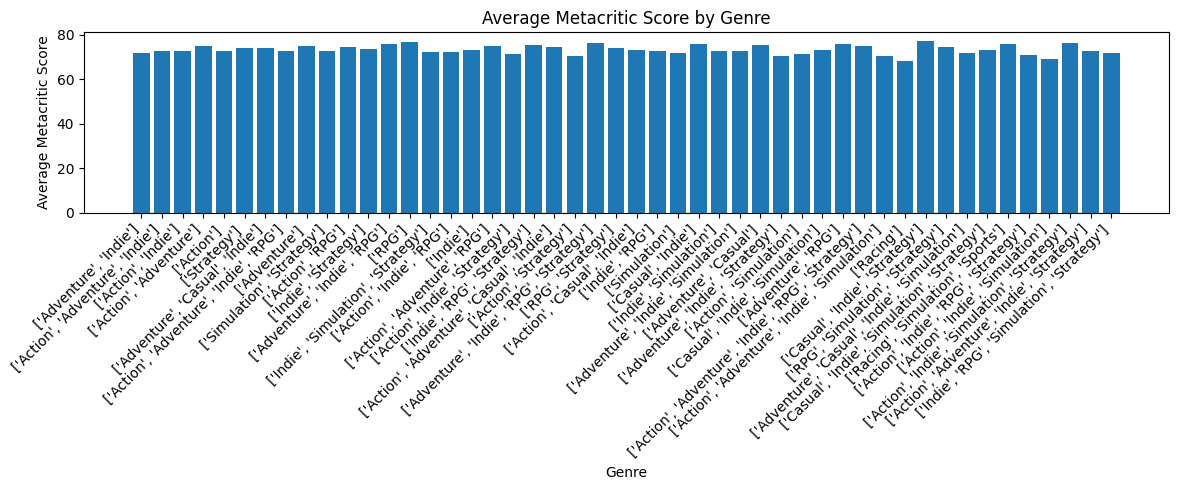

In [29]:
plt.figure(figsize=(12,5))
plt.bar(genre_stats.index, genre_stats["meta_score"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Metacritic Score")
plt.xlabel("Genre")
plt.title("Average Metacritic Score by Genre")
plt.tight_layout()
plt.show()


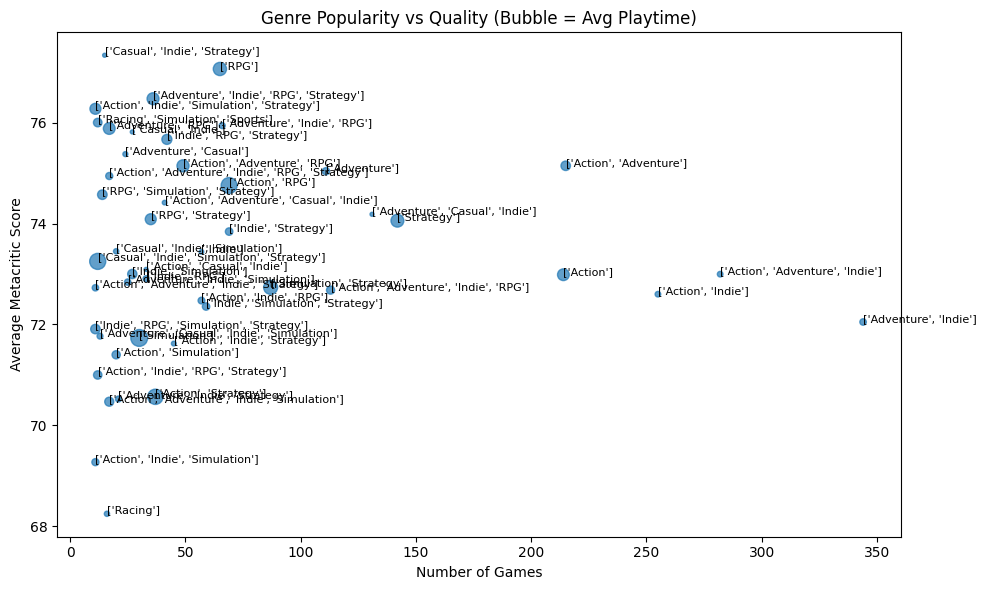

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(
    genre_stats["genre_count"],
    genre_stats["meta_score"],
    s=genre_stats["average_playtime"] / 10,
    alpha=0.7
)

for genre in genre_stats.index:
    plt.text(
        genre_stats.loc[genre, "genre_count"],
        genre_stats.loc[genre, "meta_score"],
        genre,
        fontsize=8
    )

plt.xlabel("Number of Games")
plt.ylabel("Average Metacritic Score")
plt.title("Genre Popularity vs Quality (Bubble = Avg Playtime)")
plt.tight_layout()
plt.show()


# Evalution

- No single game is going to dominate in all categories when it comes to user engagement.
- There are no patterns that can be discerned when it comes to the highest played games and they will vary in quality from one title to the next.
- Despite the difference in the number of games belonging to a genre, the average metacritic score of an entire genre is similar to the scores of other genres.

#Conclusions

This analysis demonstrates:

- Data loading and cleaning techniques
- Statistical analysis
- Data visualization
- Modular code organization with helper functions
- Brief evaluation of data